In [1]:
from utils.query_db import db_connection
from IPython.display import Image

### **`INNER JOIN`**

#### Syntax

The syntax for the **`INNER JOIN`** in PostgreSQL is:

```
SELECT columns 
FROM table1 
[ INNER ] JOIN table2
ON table1.column = table2.column;
```
Keyword **`INNER`** is optional - if omitted, Postgres will treat the join as **`INNER JOIN`** by default.
#### Visual Illustration
The PostgreSQL **`INNER JOIN`** would return the records where *table1* and *table2* intersect. In this visual diagram, the PostgreSQL **`INNER JOIN`** returns the shaded area:

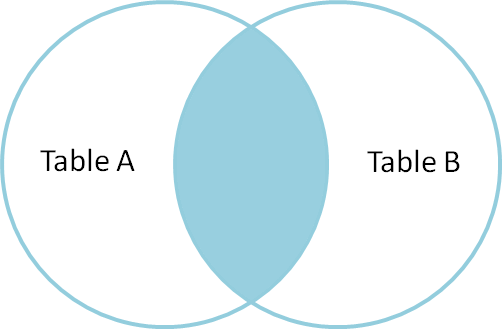

In [2]:
Image("../images/INNER JOIN figure 1.png")

#### Example

Here is an example of a PostgreSQL **`INNER JOIN`**:
```
SELECT suppliers.supplier_id, suppliers.supplier_name, orders.order_date
FROM suppliers 
INNER JOIN orders
ON suppliers.supplier_id = orders.supplier_id;
```
This PostgreSQL INNER JOIN example would return all rows from the suppliers and orders tables where there is a matching supplier_id value in both the suppliers and orders tables.

In [3]:
with db_connection() as conn:
    conn.fetch_all("""
        SELECT payment.*,  -- Need to specify scope
               first_name, -- Found only in the `customer` table
               last_name,
               email
        FROM payment
        INNER JOIN customer
            ON payment.customer_id = customer.customer_id;
        """)

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,first_name,last_name,email
0,17503,341,2,1520,7.99,2007-02-15 22:25:46.996577,Peter,Menard,peter.menard@sakilacustomer.org
1,17504,341,1,1778,1.99,2007-02-16 17:23:14.996577,Peter,Menard,peter.menard@sakilacustomer.org
2,17505,341,1,1849,7.99,2007-02-16 22:41:45.996577,Peter,Menard,peter.menard@sakilacustomer.org
3,17506,341,2,2829,2.99,2007-02-19 19:39:56.996577,Peter,Menard,peter.menard@sakilacustomer.org
4,17507,341,2,3130,7.99,2007-02-20 17:31:48.996577,Peter,Menard,peter.menard@sakilacustomer.org
...,...,...,...,...,...,...,...,...,...
14591,32094,245,2,12682,2.99,2007-05-14 13:44:29.996577,Courtney,Day,courtney.day@sakilacustomer.org
14592,32095,251,1,14107,0.99,2007-05-14 13:44:29.996577,Vickie,Brewer,vickie.brewer@sakilacustomer.org
14593,32096,252,2,13756,4.99,2007-05-14 13:44:29.996577,Mattie,Hoffman,mattie.hoffman@sakilacustomer.org
14594,32097,263,1,15293,0.99,2007-05-14 13:44:29.996577,Hilda,Hopkins,hilda.hopkins@sakilacustomer.org


### **`FULL OUTER JOIN`**

#### Syntax

The syntax for the **`FULL OUTER JOIN`** in PostgreSQL is:

```
SELECT columns
FROM table1
FULL [ OUTER ] JOIN table2
ON table1.column = table2.column;
```
Keyword **`OUTER`** is optional.
#### Visual Illustration
The PostgreSQL **`FULL OUTER JOIN`** would return the all records from both *table1* and *table2*. In this visual diagram, the PostgreSQL **`FULL OUTER JOIN`** returns the shaded area:

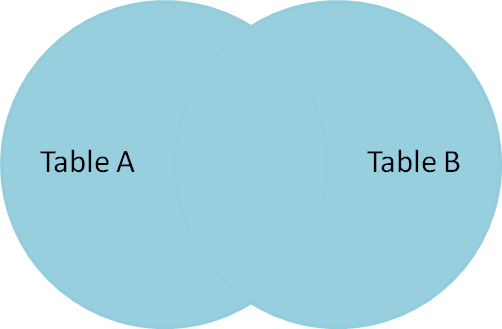

In [4]:
Image("../images/FULL OUTER JOIN figure 1.png")

#### Example

Here is an example of a PostgreSQL **`FULL OUTER JOIN`**:
```
SELECT suppliers.supplier_id, suppliers.supplier_name, orders.order_date
FROM suppliers
FULL OUTER JOIN orders
ON suppliers.supplier_id = orders.supplier_id;
```
This **`FULL OUTER JOIN`** example would return all rows from the suppliers table and all rows from the orders table and whenever the join condition is not met, `<null>`s would be extended to those fields in the result set.

If a supplier_id value in the suppliers table does not exist in the orders table, all fields in the orders table will display as `<null>` in the result set. If a `supplier_id` value in the orders table does not exist in the suppliers table, all fields in the suppliers table will display as `<null>` in the result set.

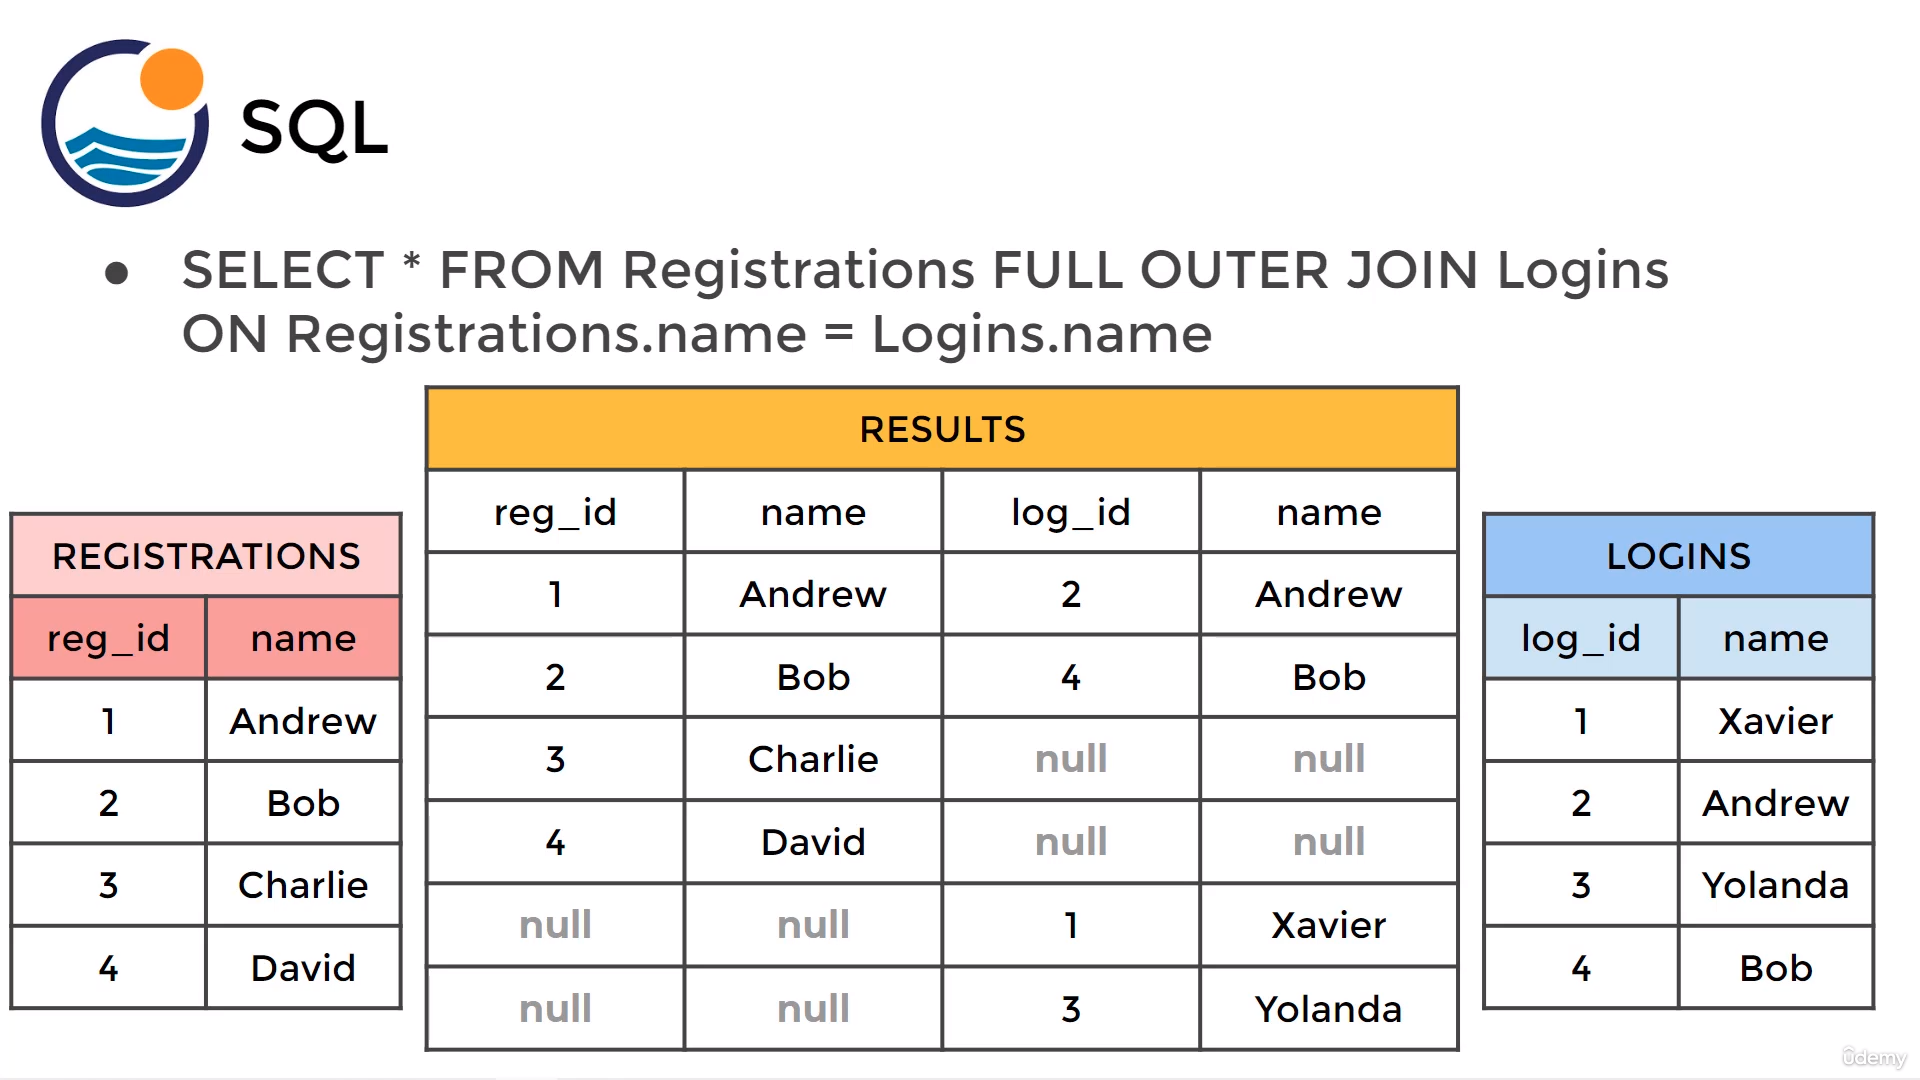

In [5]:
Image("../images/FULL OUTER JOIN figure 2.png")

In [6]:
with db_connection() as conn:
    conn.fetch_all("""
        SELECT * 
        FROM customer FULL OUTER JOIN payment
            ON customer.customer_id = payment.customer_id;
        """)

,customer_id,store_id,first_name,last_name,email,address_id,activebool,create_date,last_update,active,payment_id,customer_id,staff_id,rental_id,amount,payment_date
0,341,1,Peter,Menard,peter.menard@sakilacustomer.org,346,True,2006-02-14,2013-05-26 14:49:45.738,1,17503,341,2,1520,7.99,2007-02-15 22:25:46.996577
1,341,1,Peter,Menard,peter.menard@sakilacustomer.org,346,True,2006-02-14,2013-05-26 14:49:45.738,1,17504,341,1,1778,1.99,2007-02-16 17:23:14.996577
2,341,1,Peter,Menard,peter.menard@sakilacustomer.org,346,True,2006-02-14,2013-05-26 14:49:45.738,1,17505,341,1,1849,7.99,2007-02-16 22:41:45.996577
3,341,1,Peter,Menard,peter.menard@sakilacustomer.org,346,True,2006-02-14,2013-05-26 14:49:45.738,1,17506,341,2,2829,2.99,2007-02-19 19:39:56.996577
4,341,1,Peter,Menard,peter.menard@sakilacustomer.org,346,True,2006-02-14,2013-05-26 14:49:45.738,1,17507,341,2,3130,7.99,2007-02-20 17:31:48.996577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14591,245,1,Courtney,Day,courtney.day@sakilacustomer.org,249,True,2006-02-14,2013-05-26 14:49:45.738,1,32094,245,2,12682,2.99,2007-05-14 13:44:29.996577
14592,251,2,Vickie,Brewer,vickie.brewer@sakilacustomer.org,255,True,2006-02-14,2013-05-26 14:49:45.738,1,32095,251,1,14107,0.99,2007-05-14 13:44:29.996577
14593,252,2,Mattie,Hoffman,mattie.hoffman@sakilacustomer.org,256,True,2006-02-14,2013-05-26 14:49:45.738,1,32096,252,2,13756,4.99,2007-05-14 13:44:29.996577
14594,263,1,Hilda,Hopkins,hilda.hopkins@sakilacustomer.org,268,True,2006-02-14,2013-05-26 14:49:45.738,1,32097,263,1,15293,0.99,2007-05-14 13:44:29.996577


It is also possible to create an exclusive disjunction (Exclusive *or*, or **XOR**) with **`FULL OUTER JOIN`** using the following syntax:

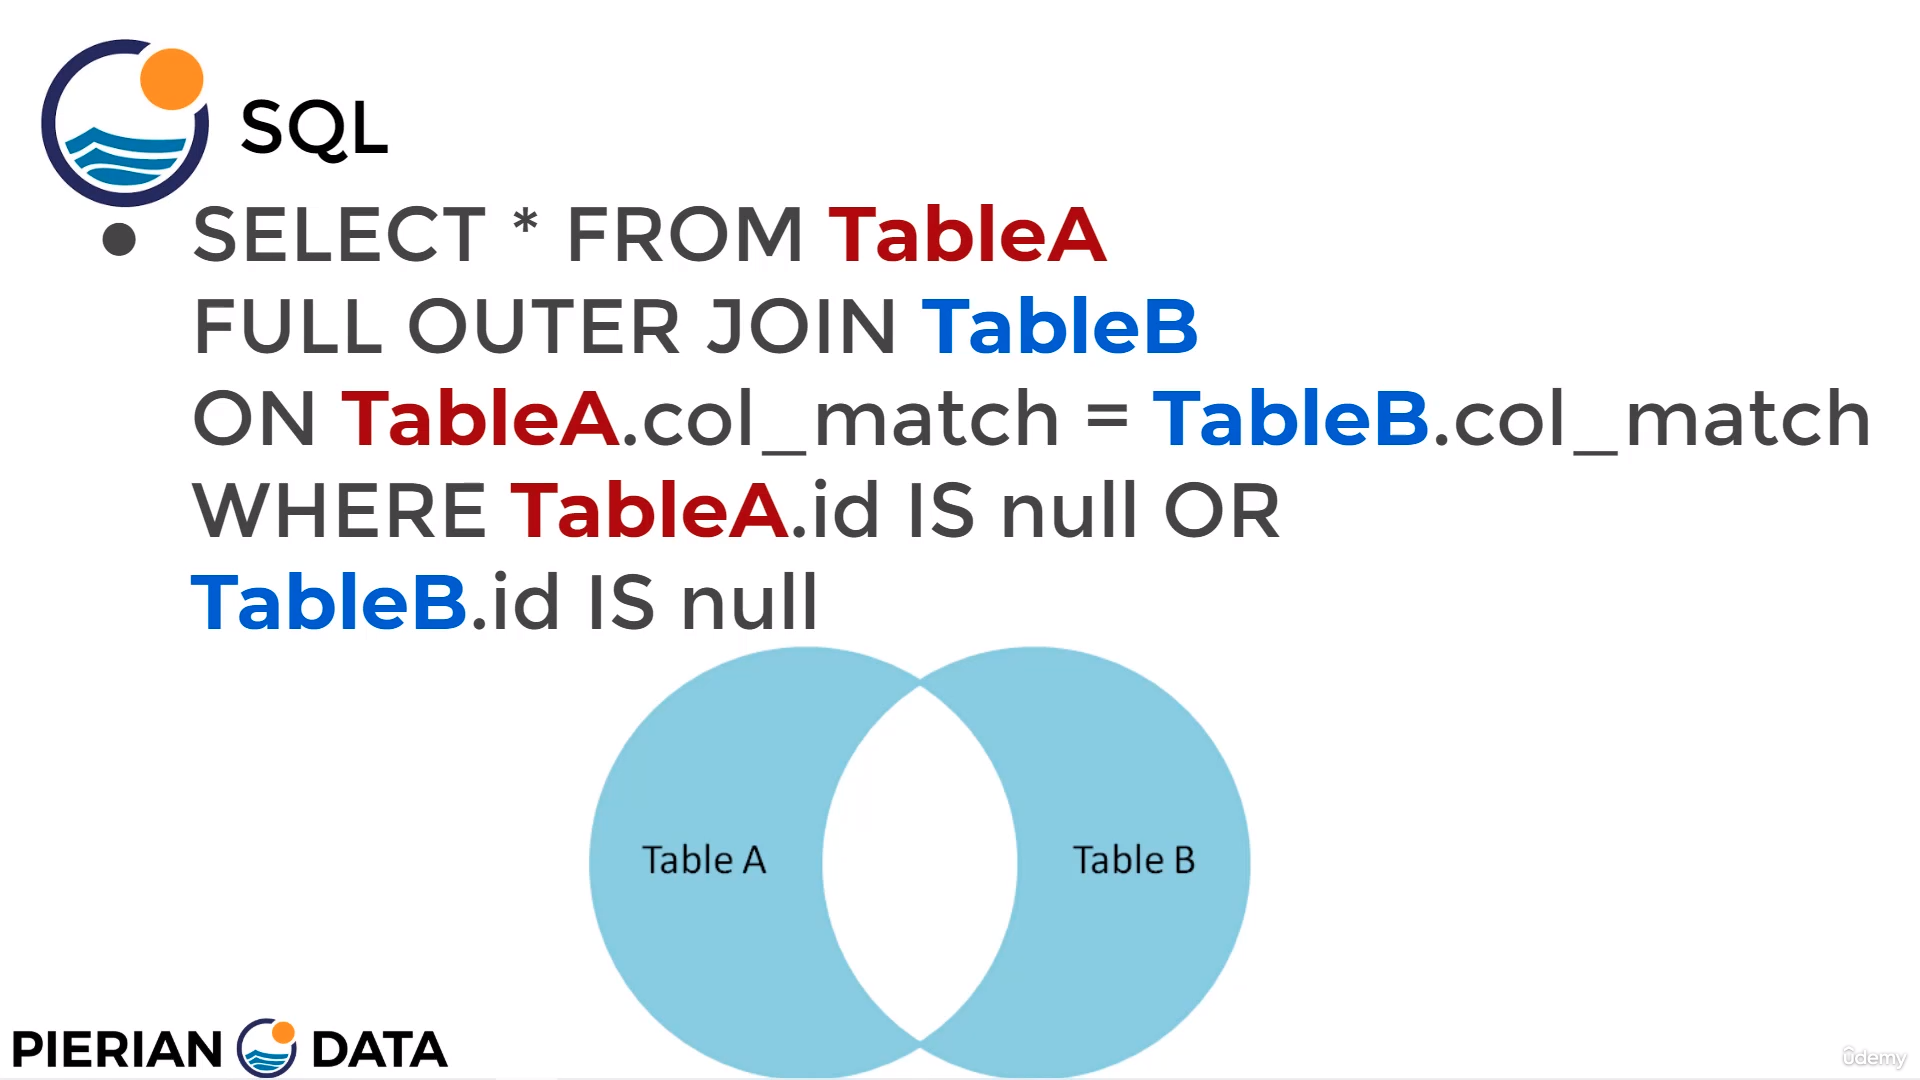

In [7]:
Image("../images/FULL OUTER JOIN figure 3.png")

The resulting table will show results that are unique only to Table A or unique only to Table B.

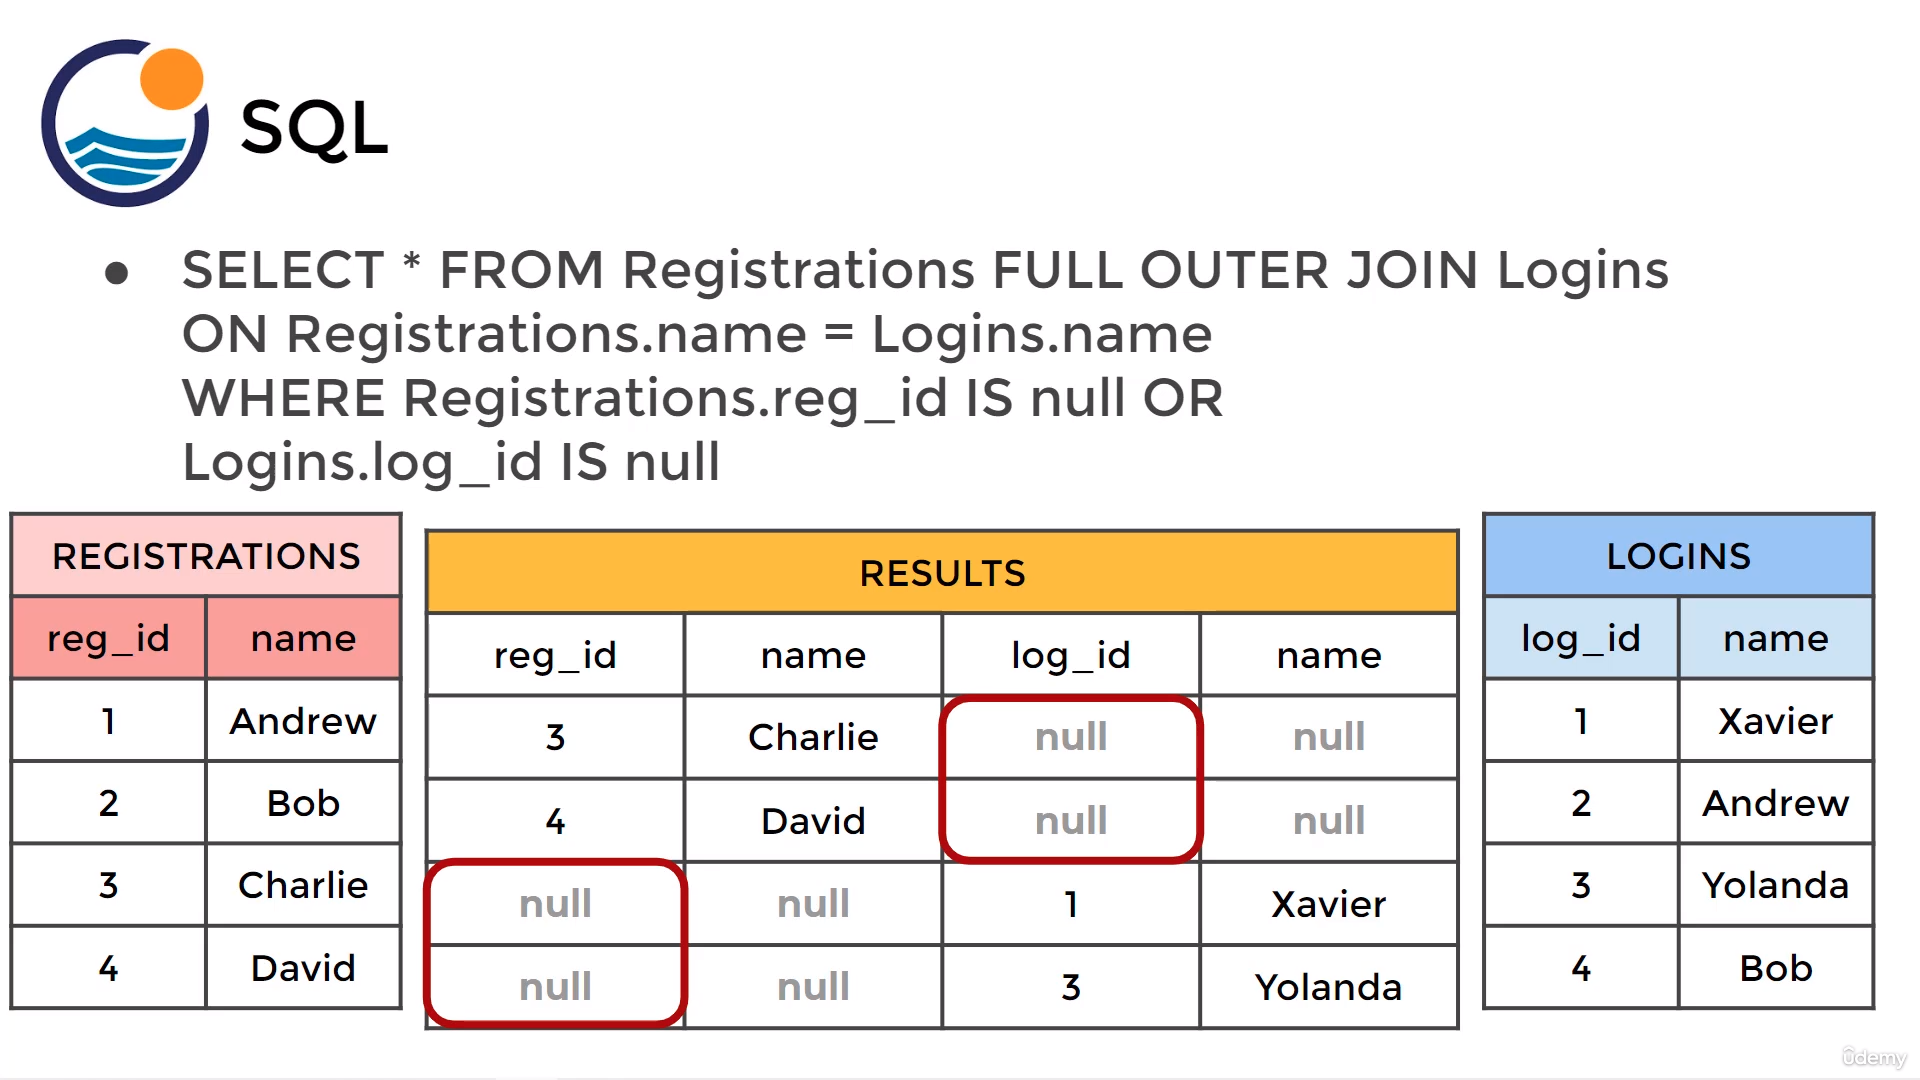

In [8]:
Image("../images/FULL OUTER JOIN figure 4.png")

In [9]:
with db_connection() as conn:
    conn.fetch_all("""
        SELECT inv.inventory_id,
               inv.store_id,
               film.*
        FROM inventory AS inv FULL OUTER JOIN film
            ON inv.film_id = film.film_id
        WHERE inv.inventory_id IS null 
            OR film.film_id IS null;
        """)

,inventory_id,store_id,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,None,None,802,Sky Miracle,A Epic Drama of a Mad Scientist And a Explorer...,2006,1,7,2.99,132,15.99,PG,2013-05-26 14:50:58.951,"[Trailers, Commentaries, Deleted Scenes]",'abandon':20 'drama':5 'epic':4 'explor':12 'f...
1,None,None,497,Kill Brotherhood,A Touching Display of a Hunter And a Secret Ag...,2006,1,4,0.99,54,15.99,G,2013-05-26 14:50:58.951,"[Trailers, Commentaries]",'agent':12 'brotherhood':2 'display':5 'hunter...
2,None,None,801,Sister Freddy,A Stunning Saga of a Butler And a Woman who mu...,2006,1,5,4.99,152,19.99,PG-13,2013-05-26 14:50:58.951,"[Trailers, Behind the Scenes]",'australia':18 'butler':8 'explor':16 'freddi'...
3,None,None,359,Gladiator Westward,A Astounding Reflection of a Squirrel And a Su...,2006,1,6,4.99,173,20.99,PG,2013-05-26 14:50:58.951,"[Commentaries, Deleted Scenes]",'ancient':19 'astound':4 'dentist':17 'gladiat...
4,None,None,325,Floats Garden,A Action-Packed Epistle of a Robot And a Car w...,2006,1,6,2.99,145,29.99,PG-13,2013-05-26 14:50:58.951,"[Trailers, Commentaries, Behind the Scenes]",'action':5 'action-pack':4 'ancient':20 'boat'...
5,None,None,33,Apollo Teen,A Action-Packed Reflection of a Crocodile And ...,2006,1,5,2.99,153,15.99,PG-13,2013-05-26 14:50:58.951,"[Trailers, Commentaries, Deleted Scenes, Behin...",'abandon':22 'action':5 'action-pack':4 'apoll...
6,None,None,198,Crystal Breaking,A Fast-Paced Character Study of a Feminist And...,2006,1,6,2.99,184,22.99,NC-17,2013-05-26 14:50:58.951,"[Trailers, Commentaries]",'ancient':22 'break':2 'charact':7 'chef':20 '...
7,None,None,419,Hocus Frida,A Awe-Inspiring Tale of a Girl And a Madman wh...,2006,1,4,2.99,141,19.99,G,2013-05-26 14:50:58.951,"[Trailers, Deleted Scenes, Behind the Scenes]",'awe':5 'awe-inspir':4 'frida':2 'girl':10 'ho...
8,None,None,332,Frankenstein Stranger,A Insightful Character Study of a Feminist And...,2006,1,7,0.99,159,16.99,NC-17,2013-05-26 14:50:58.951,"[Deleted Scenes, Behind the Scenes]",'charact':5 'chef':18 'feminist':9 'frankenste...
9,None,None,712,Raiders Antitrust,A Amazing Drama of a Teacher And a Feminist wh...,2006,1,4,0.99,82,11.99,PG-13,2013-05-26 14:50:58.951,[Deleted Scenes],'amaz':4 'antitrust':2 'drama':5 'feminist':11...
